In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint

# Preprocess and Prepare Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
    
# variable information 
statlog_german_credit_data.variables


,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [4]:
y

# 1 -> good
# 2 -> bad

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [5]:
from sklearn.preprocessing import OneHotEncoder


cat_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Categorical"].name)
numerical_features = X.drop(columns=cat_attr)
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_attr])
feature_names = encoder.get_feature_names_out(cat_attr)
df_encoded = pd.DataFrame(X_encoded, columns=feature_names)
df_final = pd.concat([numerical_features, df_encoded], axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler


num_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Integer"].name)
scaler = MinMaxScaler()
df_final[num_attr] = scaler.fit_transform(df_final[num_attr])

In [7]:
# df_final.hist(figsize=(25, 15))

In [8]:
# map all columns to proper attribute names

attribute_mapping = {
    'Attribute1_A11': 'Status checking account: lt 0 DM',
    'Attribute1_A12': 'Status checking account: 0 lte ... lt 200 DM',
    'Attribute1_A13': 'Status checking account: gte 200 DM ',
    'Attribute1_A14': 'Status checking account: no checking account',

    'Attribute2': 'Duration in month',

    'Attribute3_A30': 'Credit history: no credits taken / all credits paid back duly',
    'Attribute3_A31': 'Credit history: all credits at this bank paid back duly',
    'Attribute3_A32': 'Credit history: existing credits paid back duly till now',
    'Attribute3_A33': 'Credit history: delay in paying off in the past',
    'Attribute3_A34': 'Credit history: critical account / other credits existing',

    'Attribute4_A40': 'Purpose: car (new)',
    'Attribute4_A41': 'Purpose: car (used)',
    'Attribute4_A42': 'Purpose: furniture/equipment',
    'Attribute4_A43': 'Purpose: radio/television',
    'Attribute4_A44': 'Purpose: domestic appliances',
    'Attribute4_A45': 'Purpose: repairs',
    'Attribute4_A46': 'Purpose: education',
    'Attribute4_A48': 'Purpose: retraining',
    'Attribute4_A49': 'Purpose: business',
    'Attribute4_A410': 'Purpose: others',

    'Attribute5': 'Credit amount',

    'Attribute6_A61': 'Savings account/bonds: lt 100 DM',
    'Attribute6_A62': 'Savings account/bonds: 100 lte ... lt 500 DM',
    'Attribute6_A63': 'Savings account/bonds: 500 lte ... lt 1000 DM',
    'Attribute6_A64': 'Savings account/bonds: gte 1000 DM',
    'Attribute6_A65': 'Savings account/bonds: unknown / no savings account',

    'Attribute7_A71': 'Present employment since: unemployed',
    'Attribute7_A72': 'Present employment since: lt 1 year',
    'Attribute7_A73': 'Present employment since: 1 lte ... lt 4 years',
    'Attribute7_A74': 'Present employment since: 4 lte ... lt 7 years',
    'Attribute7_A75': 'Present employment since: gte 7 years',

    'Attribute8': 'Installment rate in percentage of disposable income',

    'Attribute9_A91': 'Personal status and sex: male - divorced/separated',
    'Attribute9_A92': 'Personal status and sex: female - divorced/separated/married',
    'Attribute9_A93': 'Personal status and sex: male - single',
    'Attribute9_A94': 'Personal status and sex: male - married/widowed',

    'Attribute10_A101': 'Other debtors / guarantors: none',
    'Attribute10_A102': 'Other debtors / guarantors: co-applicant',
    'Attribute10_A103': 'Other debtors / guarantors: guarantor',

    'Attribute11': 'Present residence since',

    'Attribute12_A121': 'Property: real estate',
    'Attribute12_A122': 'Property: building society savings agreement / life insurance',
    'Attribute12_A123': 'Property: car or other, not in attribute 6',
    'Attribute12_A124': 'Property: unknown / no property',

    'Attribute13': 'Age in years',

    'Attribute14_A141': 'Other installment plans: bank',
    'Attribute14_A142': 'Other installment plans: stores',
    'Attribute14_A143': 'Other installment plans: none',

    'Attribute15_A151': 'Housing: rent',
    'Attribute15_A152': 'Housing: own',
    'Attribute15_A153': 'Housing: for free',

    'Attribute16': 'Number of existing credits at this bank',

    'Attribute17_A171': 'Job: unemployed/unskilled - non-resident',
    'Attribute17_A172': 'Job: unskilled - resident',
    'Attribute17_A173': 'Job: skilled employee/official',
    'Attribute17_A174': 'Job: management/self-employed/highly qualified employee/officer',

    'Attribute18': 'nr of ppl being liable to provide maintenance for',

    'Attribute19': 'Telephone: none / yes',

    'Attribute20': 'Foreign worker'
}

df_final.rename(columns=attribute_mapping, inplace=True)

In [9]:
num_attr = [attribute_mapping[attr] for attr in num_attr]

array([[<Axes: title={'center': 'Duration in month'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Age in years'}>, <Axes: >]], dtype=object)

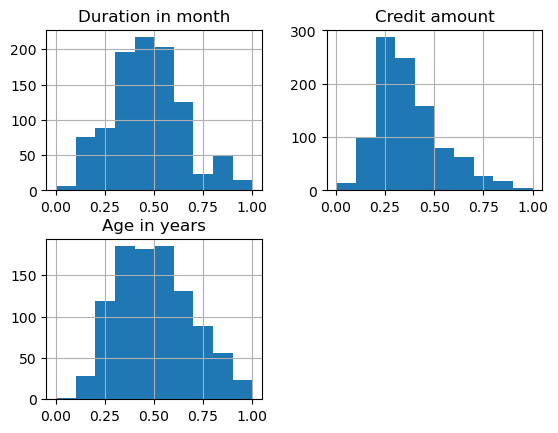

In [10]:
df_final["Duration in month"] = np.sqrt(df_final["Duration in month"] + 0.00001)
df_final["Credit amount"] = np.sqrt(df_final["Credit amount"] + 0.00001)
# df_final["Attribute13"] = np.sqrt(df_final["Attribute13"] + 0.00001)
df_final["Age in years"] = np.sqrt(df_final["Age in years"] + 0.00001)


df_final[["Duration in month", "Credit amount", "Age in years"]].hist()

# for better model performance

In [11]:
df_final["Telephone: none / yes"] = df_final["Telephone: none / yes"].map({"A192": 1, "A191": 0})
df_final["Foreign worker"] = df_final["Foreign worker"].map({"A202": 1, "A201": 0})

y["class"] = y["class"].map({1: 1, 2: 0})

C:\Users\William\AppData\Local\Temp\ipykernel_36024\1215279256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].map({1: 1, 2: 0})


In [12]:
df_final.duplicated().sum()

0

# Analyze Data

Text(0.5, 1.0, 'target class distribution')

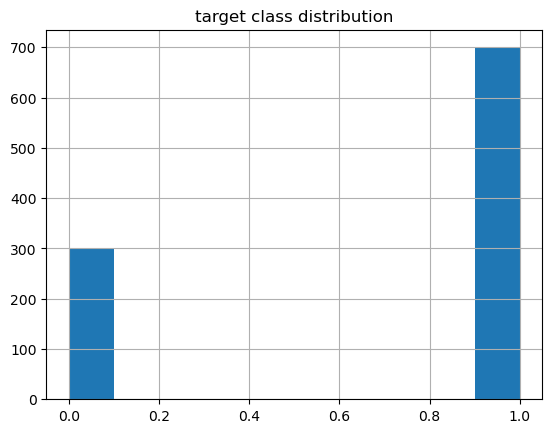

In [13]:
y.hist()
plt.title("target class distribution")

In [14]:
protected_attributes = ["Age in years", "Foreign worker", "Personal status and sex: male - divorced/separated", "Personal status and sex: female - divorced/separated/married", "Personal status and sex: male - single", "Personal status and sex: male - married/widowed"]

Text(0.5, 1.0, 'Correlation Matrix of protected attributes and target class')

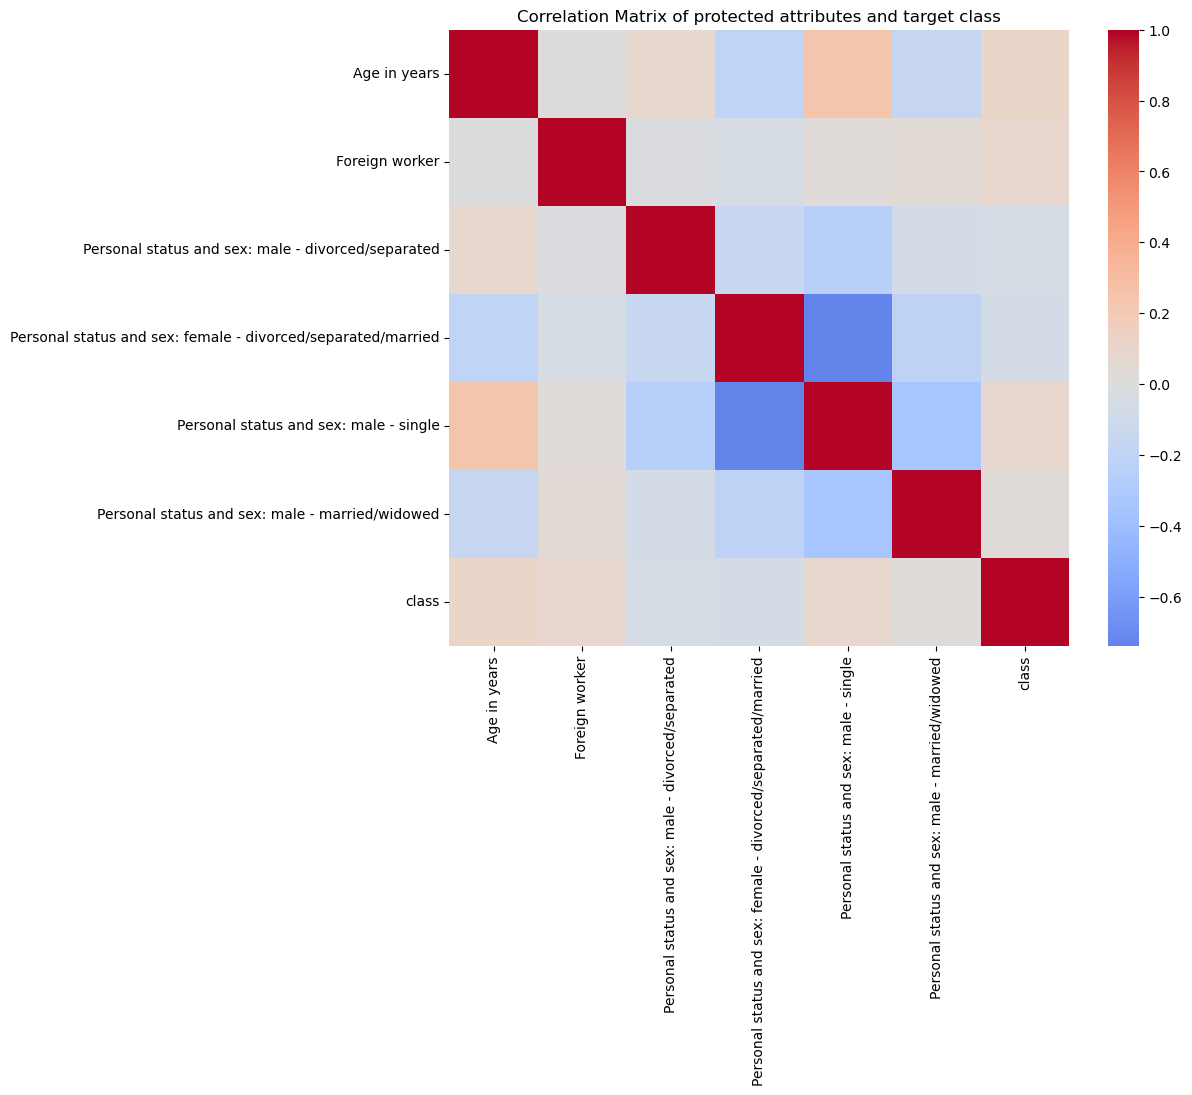

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr =  pd.concat([df_final[protected_attributes], y], axis=1).corr() 
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of protected attributes and target class")

Text(0.5, 0.98, 'numerical feature box plots')

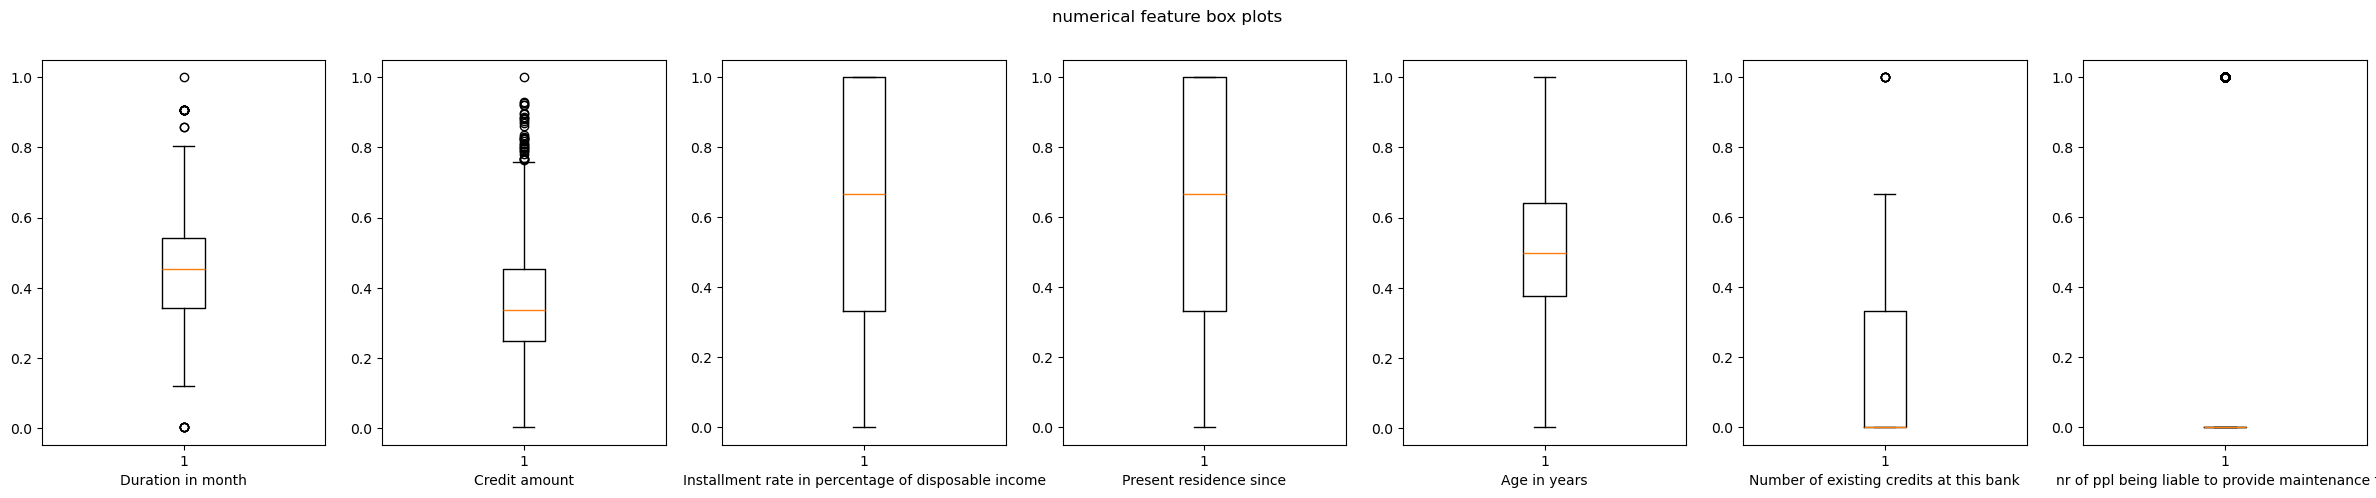

In [16]:
fig, ax = plt.subplots(1, 7, figsize=(30, 5))

for i, att in enumerate(num_attr):
    ax[i].boxplot(df_final[att])
    ax[i].set_xlabel(att)
    
fig.suptitle("numerical feature box plots")

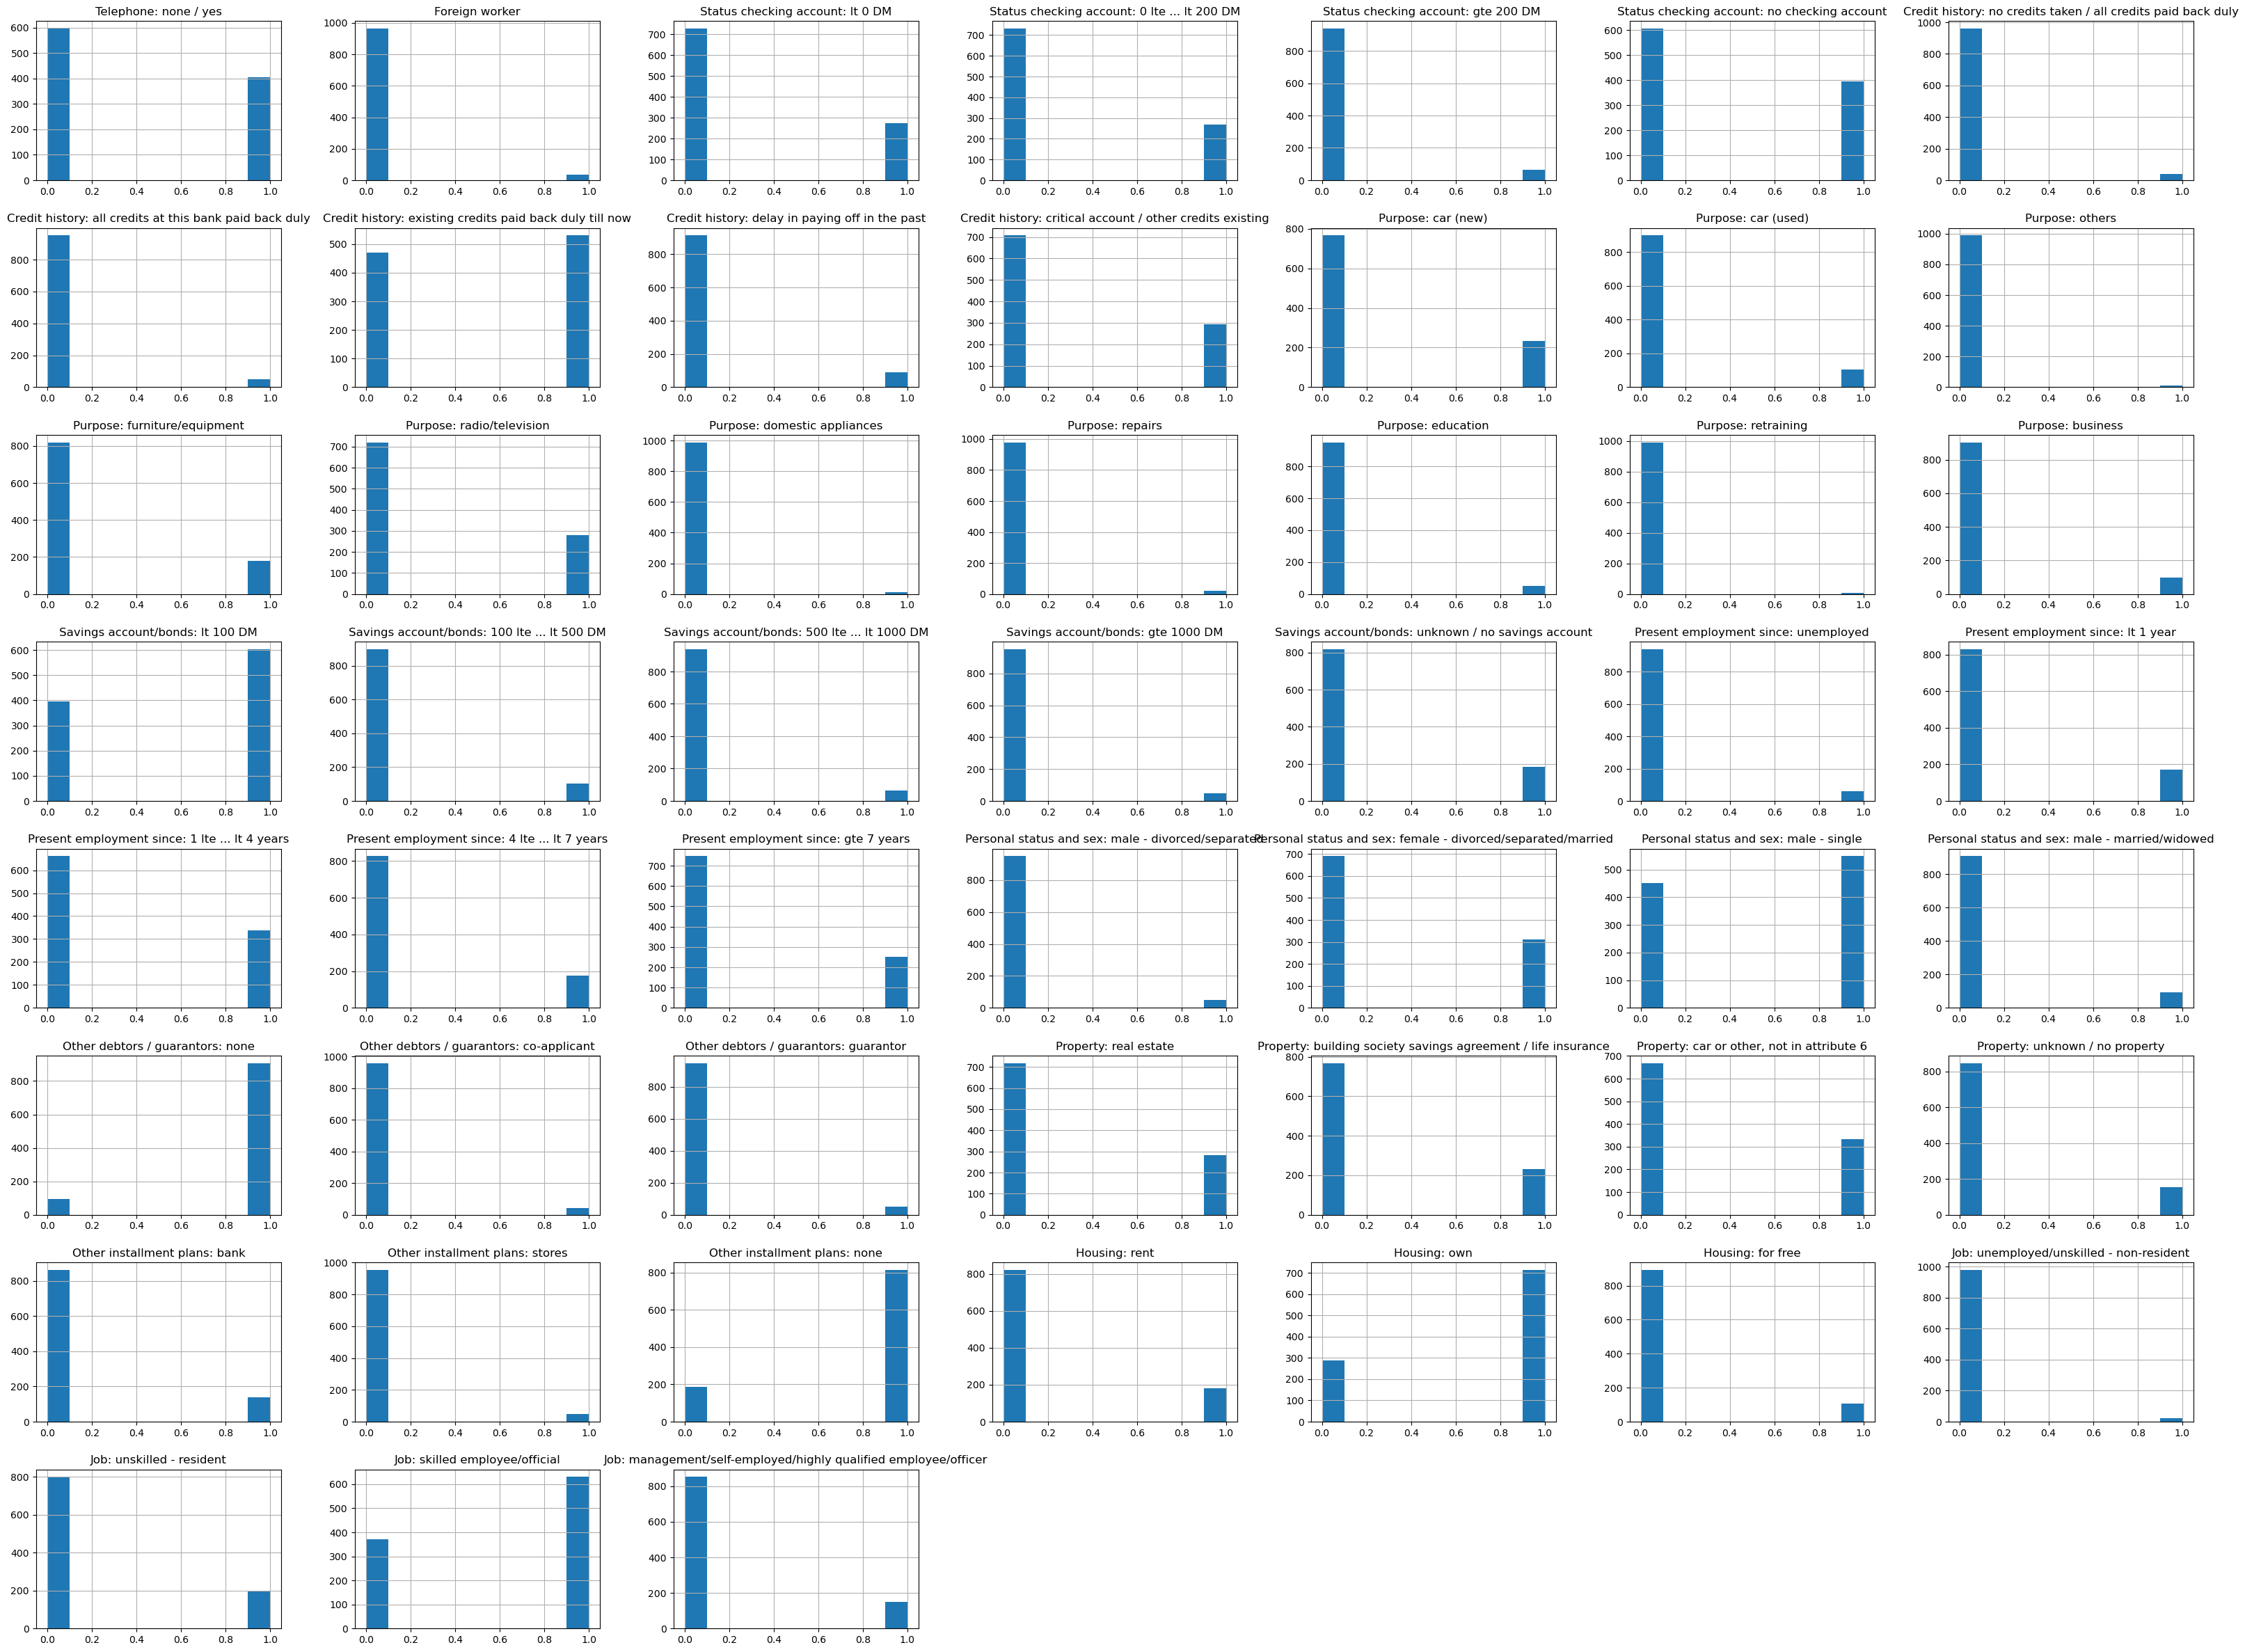

In [ ]:
# df_final.drop(columns=num_attr).hist(figsize=(40, 30));

# Analyze Data Focusing on Protected Attribute

candidates for protected attributes:
- Attribute9	Feature	Categorical	Marital Status	Personal status and sex	
- Attribute13	Feature	Integer	Age	years
- Attribute20	Feature	Binary	Other	foreign worker

potentially protected attributes:
- Attribute6	Feature	Categorical		Savings account/bonds
- Attribute7	Feature	Categorical	Other	Present employment since
- Attribute12	Feature	Categorical		Property
- Attribute15	Feature	Categorical	Other	Housing
- Attribute17	Feature	Categorical	Occupation	Job
- Attribute19	Feature	Binary		Telephone

In [18]:
data = df_final

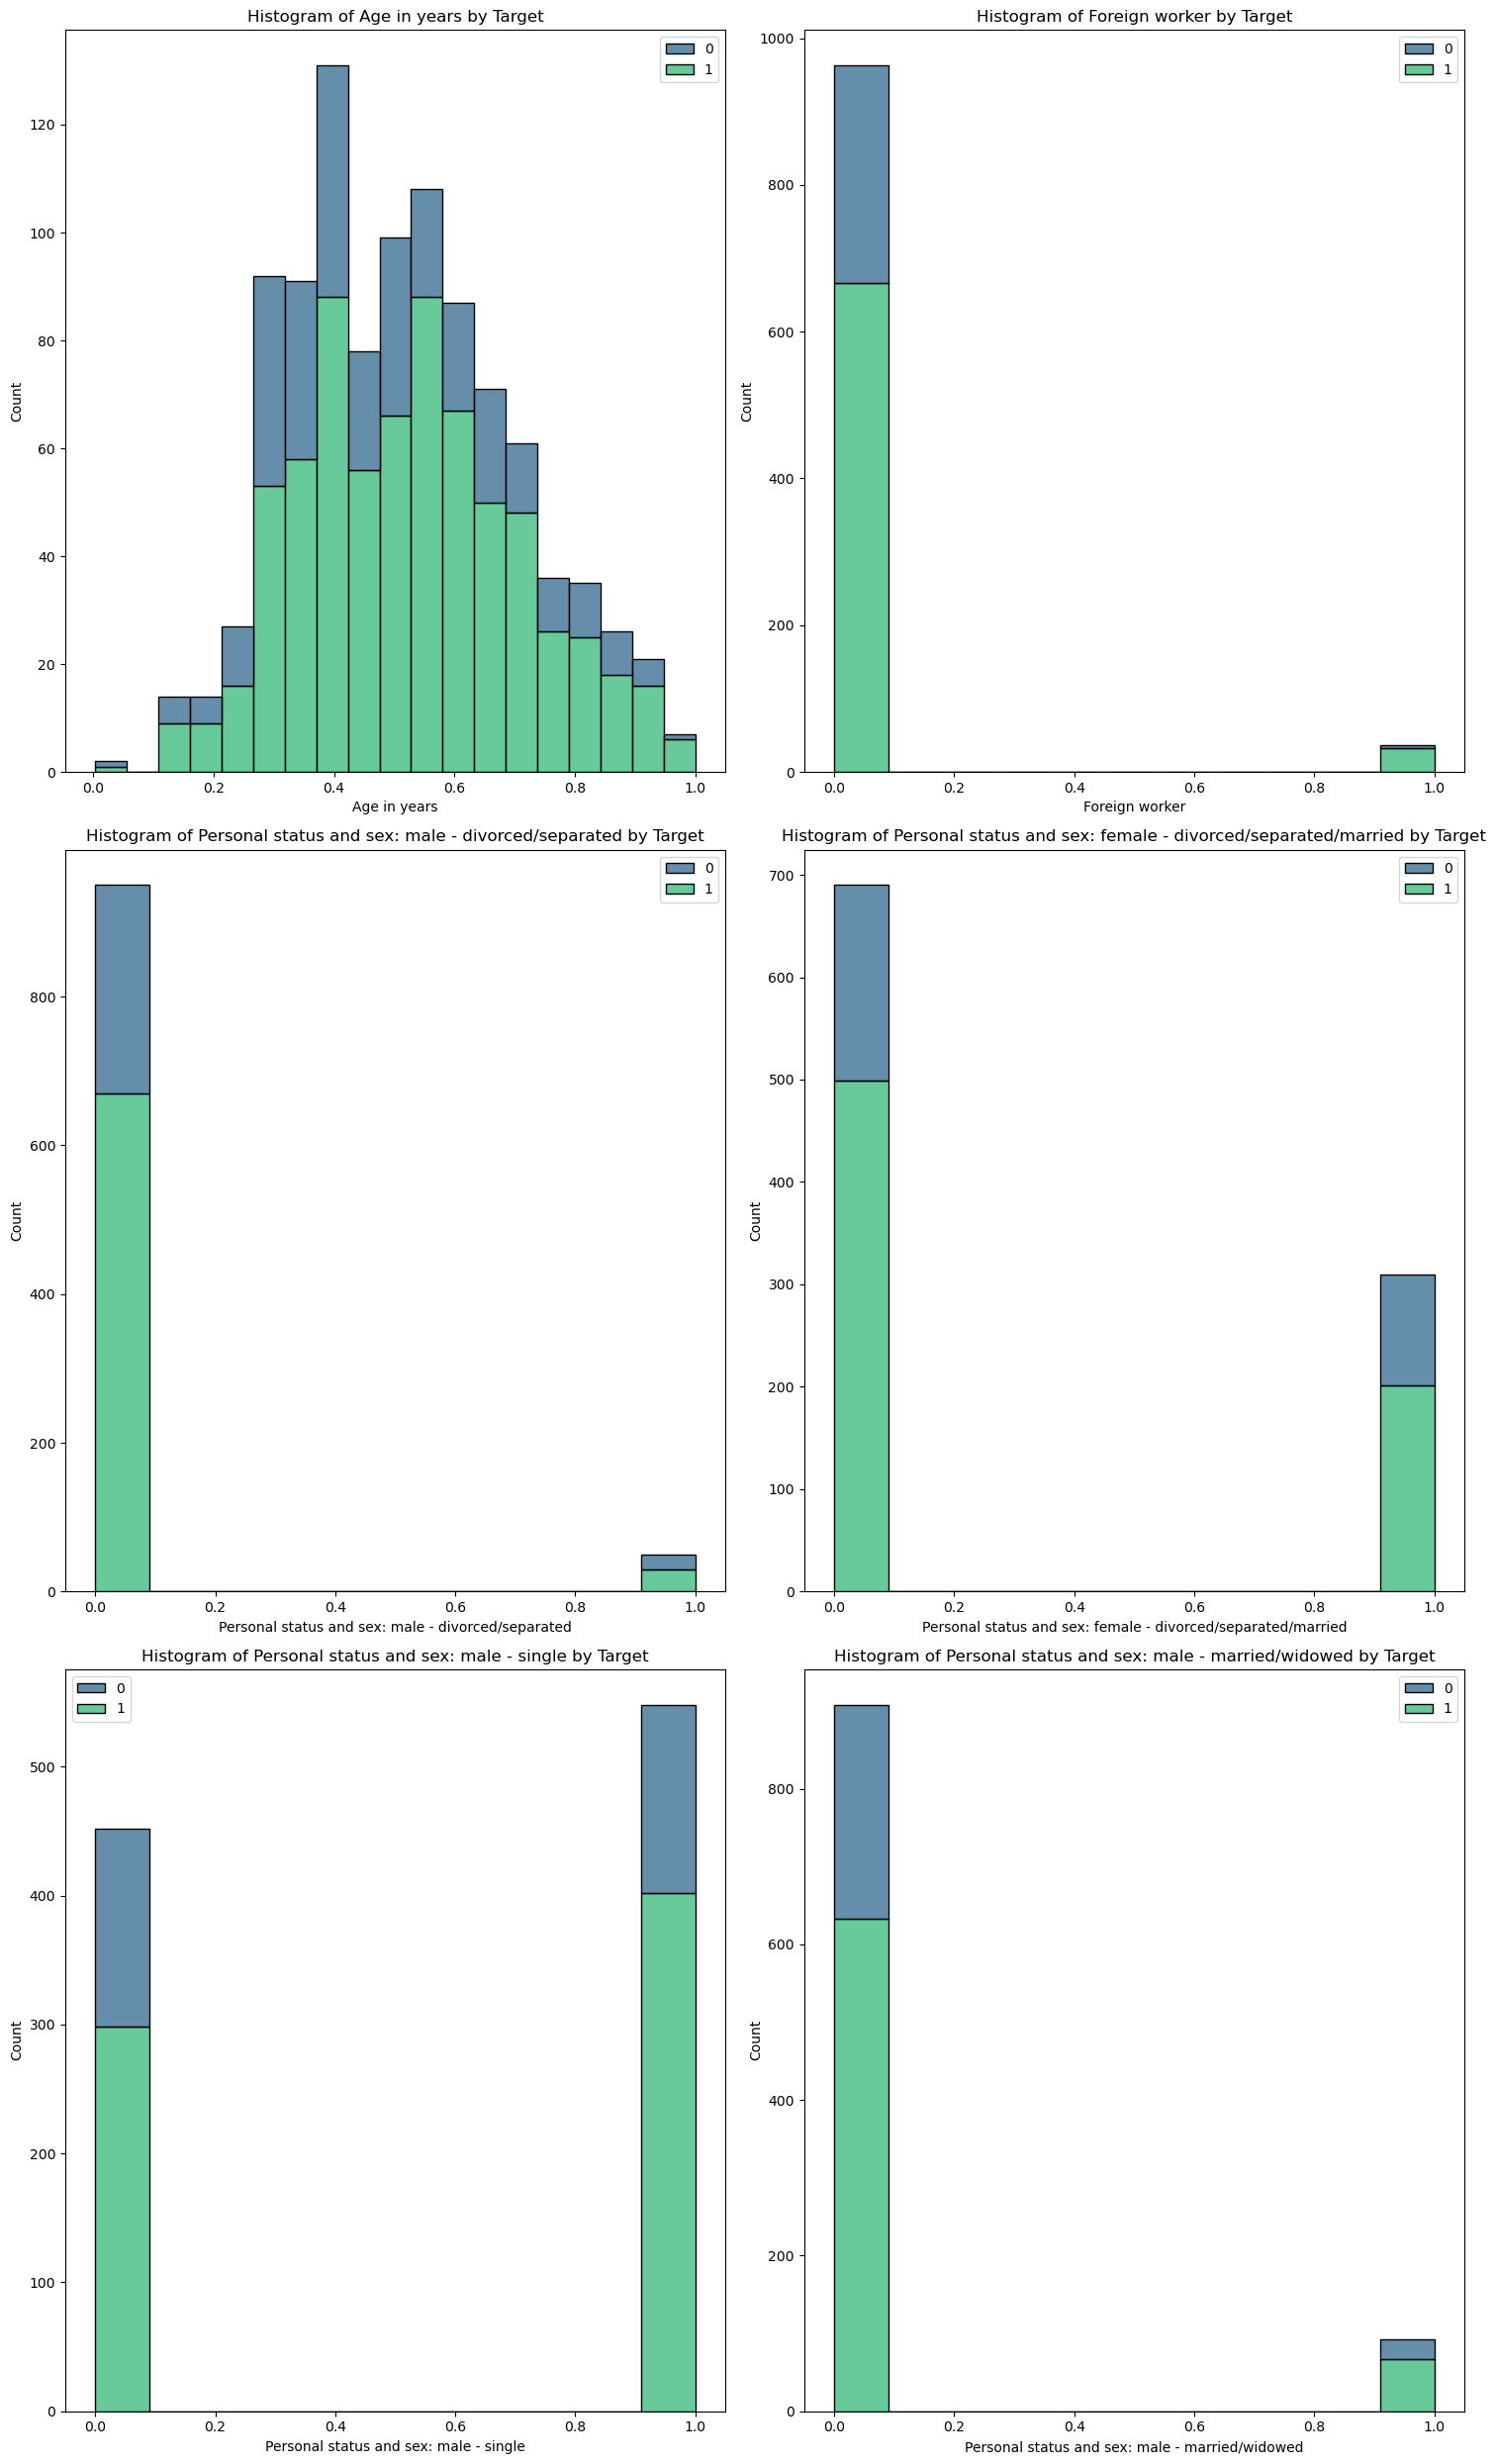

In [19]:
fig, ax = plt.subplots(3, len(protected_attributes) // 3, figsize=(15, 25))

k = 0
for i in range(3):
    for j in range(len(protected_attributes) // 3):    
        sns.histplot(data=data, x=protected_attributes[k], hue=y["class"].values, palette='viridis', multiple='stack', ax=ax[i, j])
        ax[i, j].set_title(f"Histogram of {protected_attributes[k]} by Target")
        k += 1
    
plt.tight_layout()
plt.show()

In [20]:
# data["Age in years"] = np.sqrt(data["Age in years"] + 0.00001)

# normalise the data

## observations
- No single females
- there are more divorced females than males
- Age is skewed
- there are just a few foreign workers
- males are about 50/50 single or not

Text(0.5, 1.0, 'Gender Count')

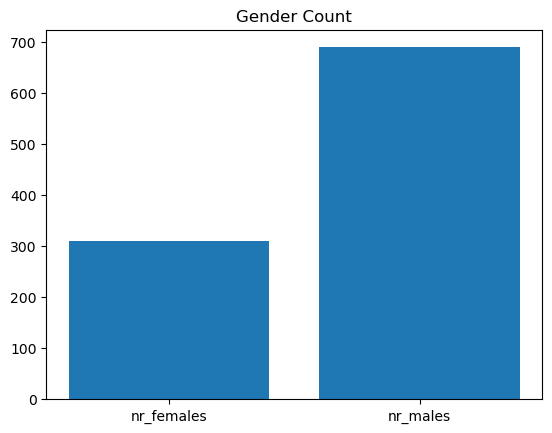

In [21]:
nr_males = (X["Attribute9"][(X["Attribute9"] == "A91") | (X["Attribute9"] == "A93") | (X["Attribute9"] == "A94")]).count()
nr_females = (X["Attribute9"][(X["Attribute9"] == "A92") | (X["Attribute9"] == "A95")]).count()

plt.bar(x=["nr_females", "nr_males"], height=[nr_females, nr_males])
plt.title("Gender Count")

# Develop Machine Learning Models and Evaluate their Performance

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
"""rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [150, 155, 160],
    'max_depth': [None, 1, 2],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    scoring='f1',   # we use f1 since data is inbalanced
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))"""

'rf = RandomForestClassifier(random_state=42)\nparam_grid = {\n    \'n_estimators\': [150, 155, 160],\n    \'max_depth\': [None, 1, 2],\n    \'min_samples_split\': [3, 4, 5],\n    \'min_samples_leaf\': [1, 2, 3]\n}\ngrid_search = GridSearchCV(\n    estimator=rf,\n    param_grid=param_grid,\n    cv=5, \n    scoring=\'f1\',   # we use f1 since data is inbalanced\n    n_jobs=-1,\n    verbose=1\n)\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n\nbest_rf = grid_search.best_estimator_\ny_pred = best_rf.predict(X_test)\nprint("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))'

In [23]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [75, 85, 95],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\William\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:09:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 95, 'subsample': 0.4}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



In [24]:
from sklearn.neural_network import MLPClassifier

"""mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.08, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))"""

'mlp = MLPClassifier(max_iter=500, random_state=42)\n\nparam_grid = {\n    \'hidden_layer_sizes\': [(100,), (150,)],\n    \'activation\': [\'relu\', \'tanh\'],\n    \'alpha\': [0.08, 0.1, 0.2]\n}\n\ngrid_search = GridSearchCV(\n    estimator=mlp,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'f1\',\n    n_jobs=-1,\n    verbose=1\n)\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n\nbest_mlp = grid_search.best_estimator_\ny_pred = best_mlp.predict(X_test)\n\nprint("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))'

### The best model is the XGB classifier. Thus we want to explain that one

# Explain the ML model(s) using an XAI technique

In [25]:
import shap
import shap.plots
import lime.lime_tabular

### Shap

In [26]:
"""rf_explainer = shap.TreeExplainer(best_rf, X_test)
rf_shap_values = rf_explainer(X_test)
rf_shap_values.values = rf_shap_values.values[:, :, 1]"""

xgb_explainer = shap.TreeExplainer(best_model) 
xgb_shap_values = xgb_explainer(X_test)

"""less_samples = shap.sample(X_test, int(len(X_test)*0.1))
mlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)
mlp_shap_values = mlp_explainer(X_test)
mlp_shap_values.values = mlp_shap_values.values[:, :, 1]"""

'less_samples = shap.sample(X_test, int(len(X_test)*0.1))\nmlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)\nmlp_shap_values = mlp_explainer(X_test)\nmlp_shap_values.values = mlp_shap_values.values[:, :, 1]'

In [27]:
prot_att_idx = np.where(data.columns.isin(protected_attributes))[0]
prot_att_shap_vals = xgb_shap_values[:, prot_att_idx]

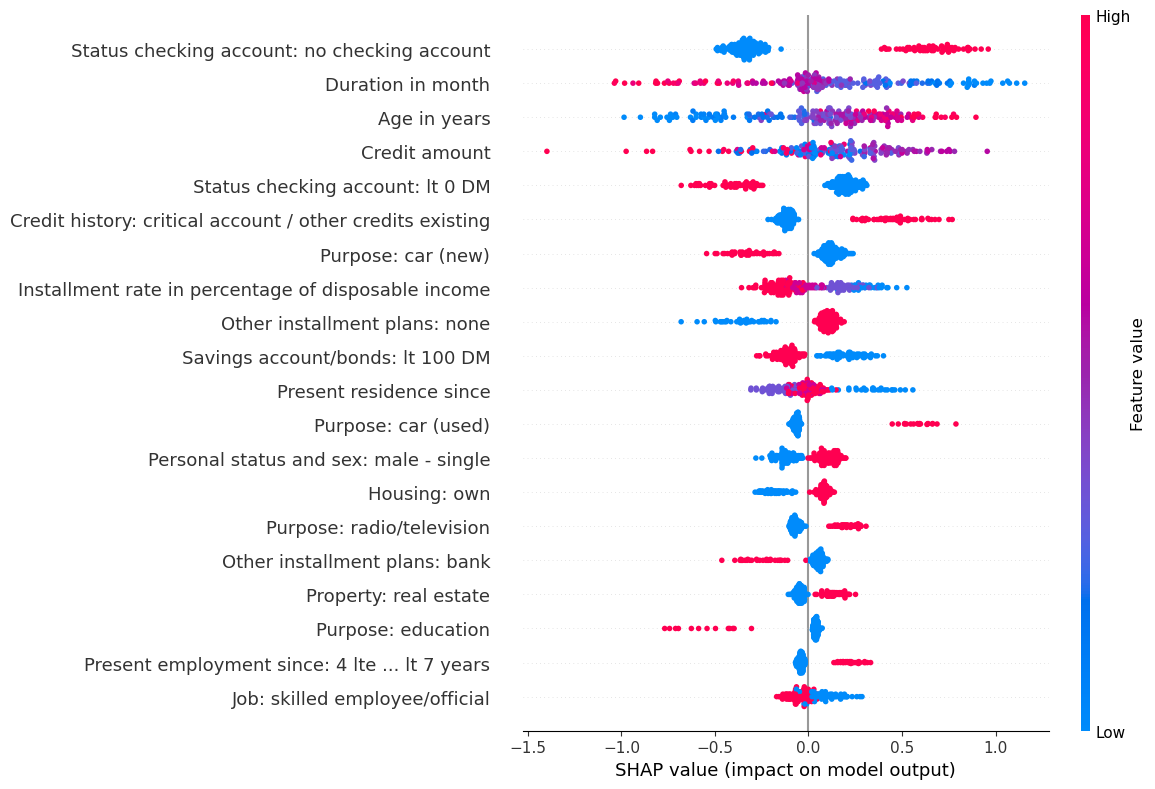

In [28]:
shap.summary_plot(xgb_shap_values, X_test, plot_size=(12, 8))

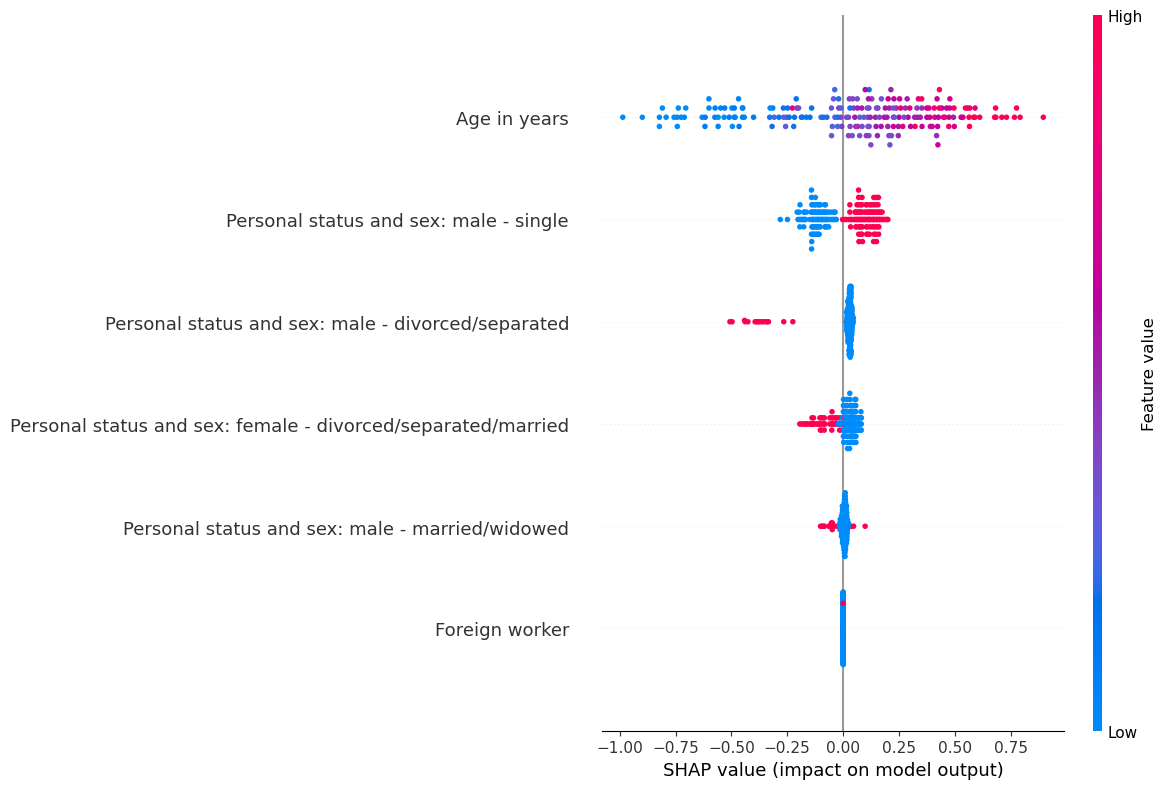

In [29]:
shap.summary_plot(prot_att_shap_vals, X_test[protected_attributes], plot_size=(12, 8))

# age and a 3 personal status features seem to have an effect on the final prediction

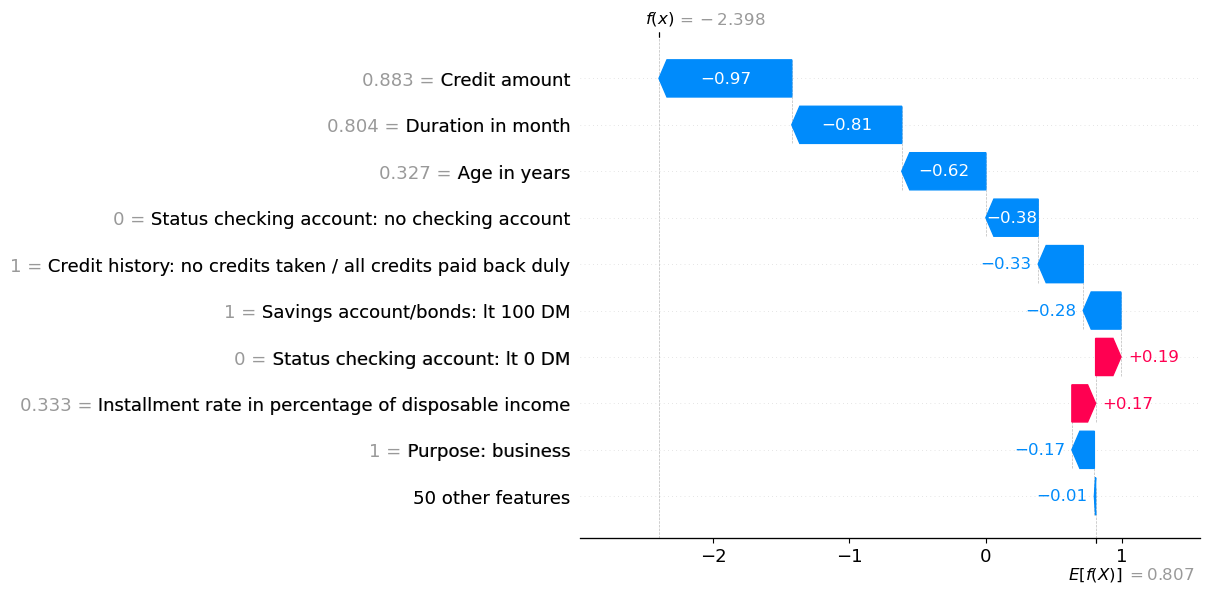

In [30]:
rand_idx = randint(0, len(xgb_shap_values))

shap.plots.waterfall(xgb_shap_values[rand_idx])

# explanation for the first sample

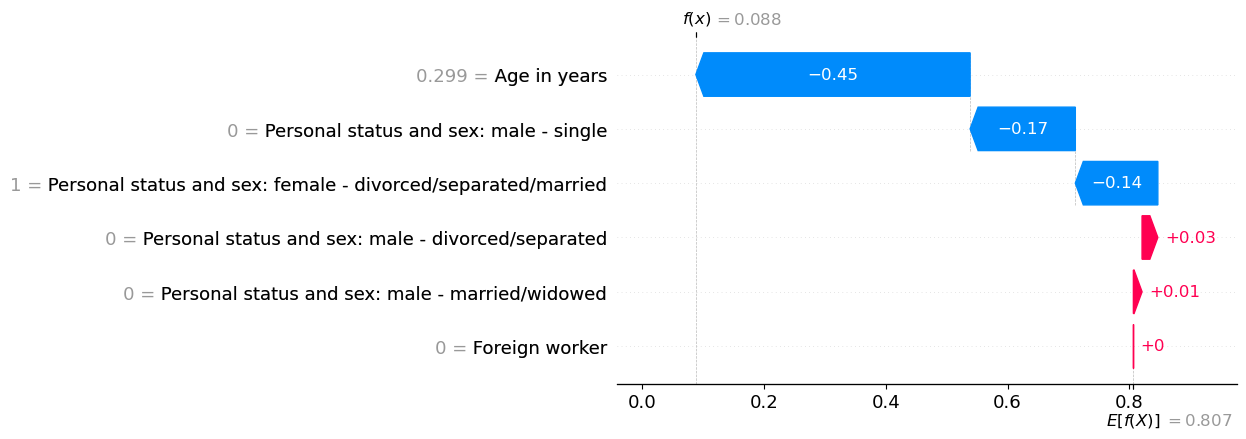

In [31]:
shap.plots.waterfall(prot_att_shap_vals[0])

# shap value of protected attributes

In [32]:
foreign_workers = X_test.reset_index()[X_test.reset_index()["Foreign worker"] == 1].index

# find foreign workers in X_test

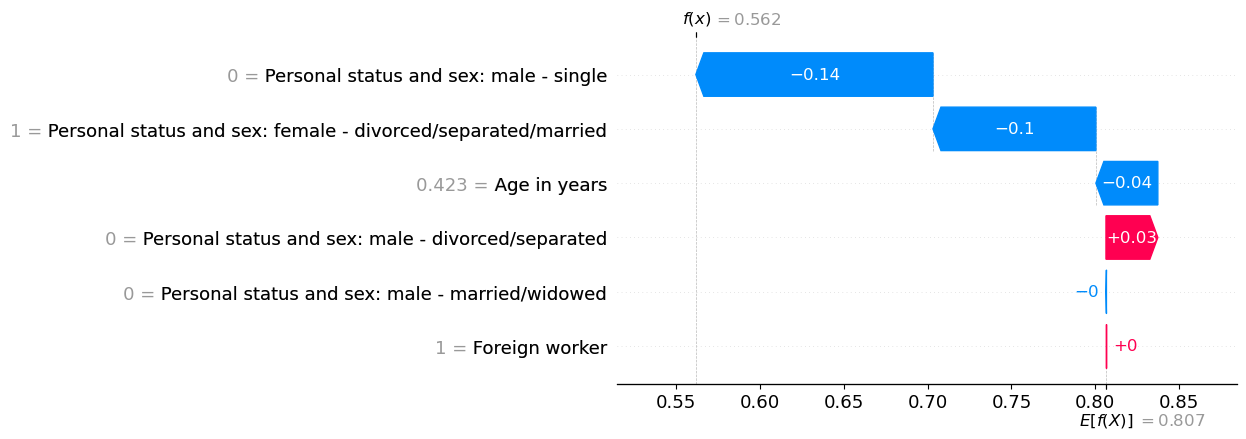

In [33]:
shap.plots.waterfall(prot_att_shap_vals[foreign_workers[randint(0, len(foreign_workers))]])

# see if the waterfall plot is different for a foreign worker
# the model seems to be pretty unbiased regarding if an individual is a foreign worker or not

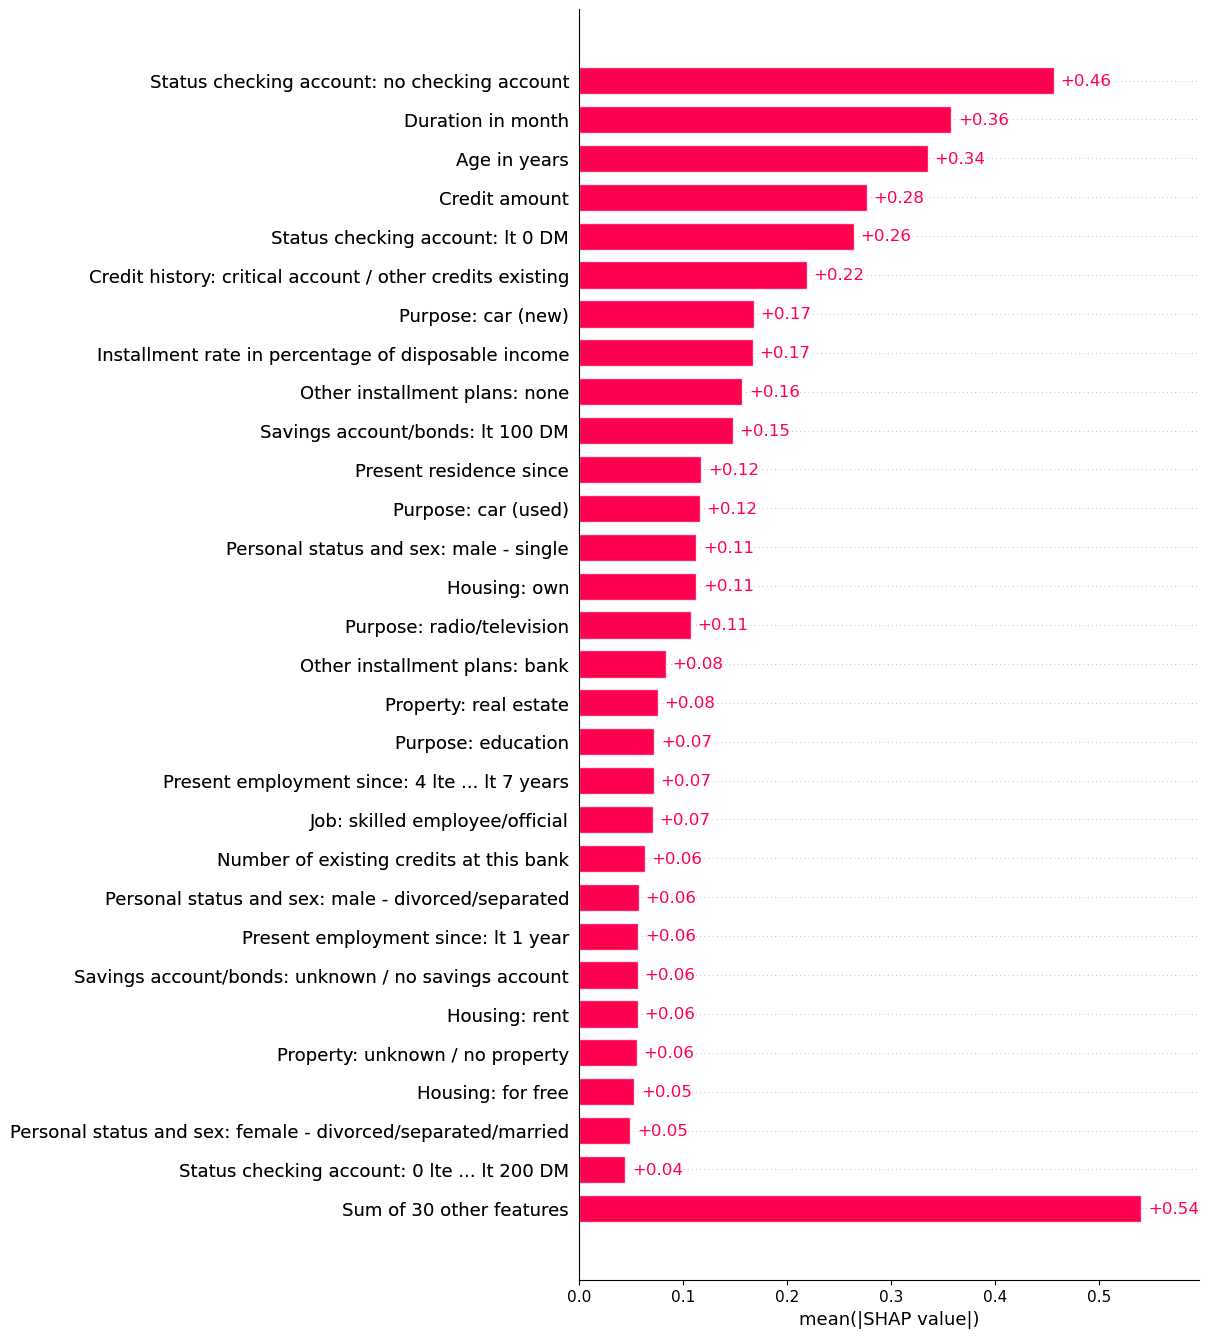

In [34]:
shap.plots.bar(xgb_shap_values, max_display=30)


# plots the mean absolute shap value for all features considering all points

In [35]:
shap_importance = -np.abs(xgb_shap_values.values).mean(axis=0)
most_important_feat = np.array(xgb_shap_values.feature_names)[shap_importance.argsort()][0]

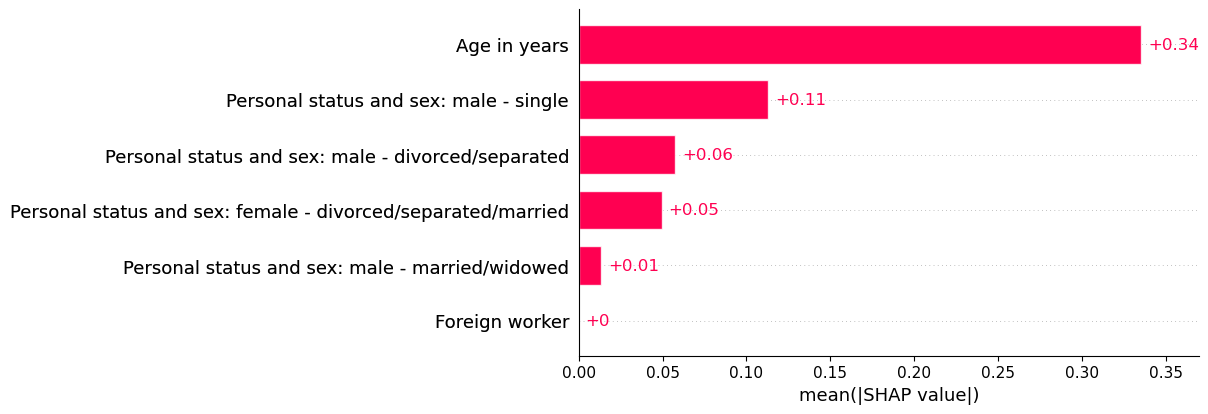

In [36]:
shap.plots.bar(prot_att_shap_vals)

# protected attribute influence

In [37]:
shap.initjs()
shap.plots.force(xgb_shap_values)

Text(0.5, 0.98, 'shap value of protected features')

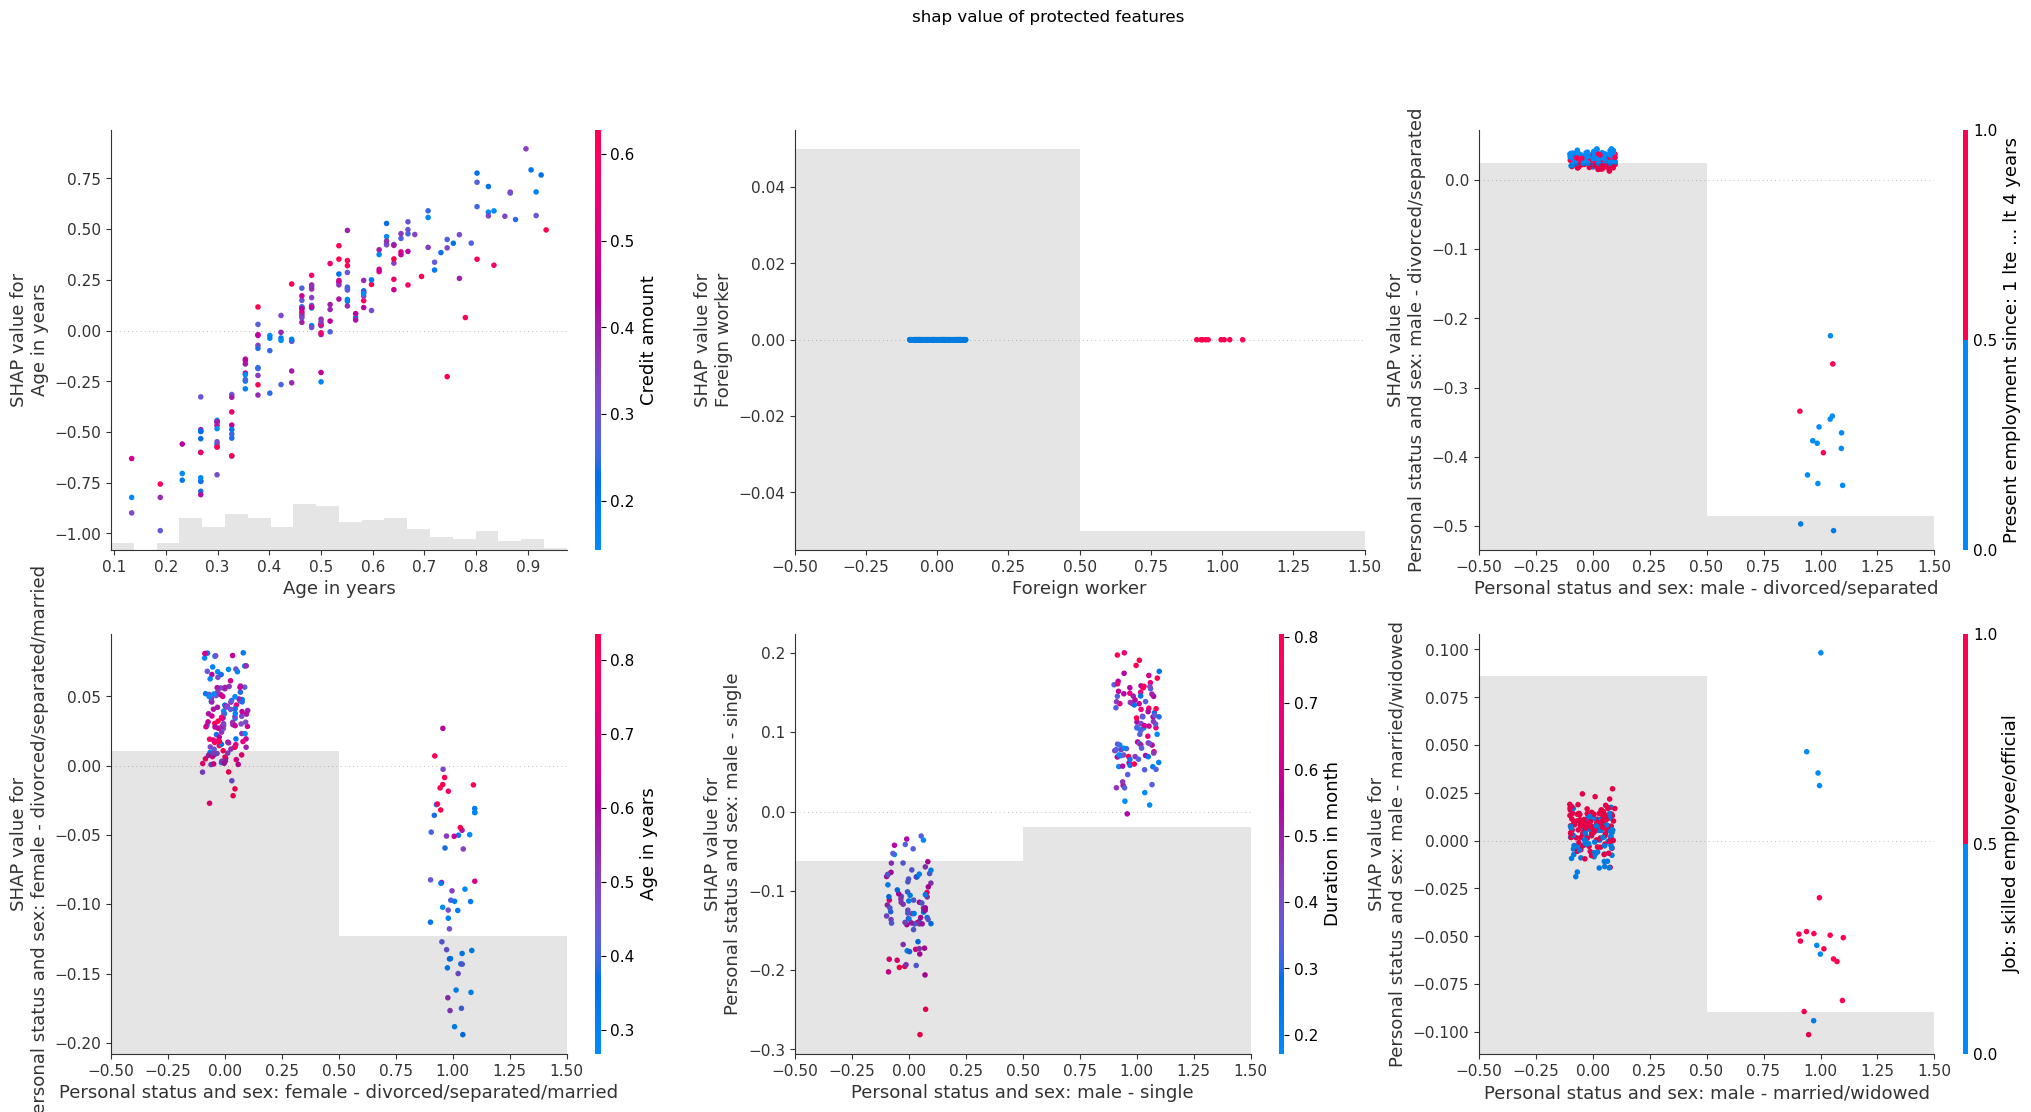

In [38]:
fig, ax = plt.subplots(2, len(protected_attributes) // 2, figsize=(25, 12))

k = 0
for i in range(2):
    for j in range(len(prot_att_idx) // 2):
        shap.plots.scatter(prot_att_shap_vals[:, k], ax=ax[i, j], show=False, color=xgb_shap_values)
        k += 1
        
fig.suptitle("shap value of protected features")

# the color is the feature which has the strongest interaction with the plotted feature

# def: interaction
# an interaction doesnt mean corelation (eg. rain x traffic = high incident rate, but rain and traffic are not crorelated)
# in our case age and creadit amount have the highest interaction (plot 0, 0) so ~higher age and ~higher credit amount = high shap value

### Lime

In [39]:
"""explainer = lime.lime_tabular.LimeTabularExplainer(
    X_test.values, 
    feature_names=list(X_test.columns), 
    discretize_continuous=True
)"""

'explainer = lime.lime_tabular.LimeTabularExplainer(\n    X_test.values, \n    feature_names=list(X_test.columns), \n    discretize_continuous=True\n)'

In [40]:
"""idx = prot_att_idx[0]
instance = X_test.iloc[idx]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)

# 1 -> good
# 0 -> bad"""

'idx = prot_att_idx[0]\ninstance = X_test.iloc[idx]\n\nexplanation = explainer.explain_instance(\n    instance,\n    best_model.predict_proba,\n    num_features=(len(feature_names) // 4),\n)\n\nexplanation.show_in_notebook(show_table=True, show_all=False)\n\n# 1 -> good\n# 0 -> bad'

In [41]:
"""idx = foreign_workers[0]
instance = X_test.iloc[idx]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)"""

'idx = foreign_workers[0]\ninstance = X_test.iloc[idx]\n\nexplanation = explainer.explain_instance(\n    instance,\n    best_model.predict_proba,\n    num_features=(len(feature_names) // 4),\n)\n\nexplanation.show_in_notebook(show_table=True, show_all=False)'

In [42]:
"""import random

instance = X_test.iloc[random.randint(0, len(X_test))]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)"""

'import random\n\ninstance = X_test.iloc[random.randint(0, len(X_test))]\n\nexplanation = explainer.explain_instance(\n    instance,\n    best_model.predict_proba,\n    num_features=(len(feature_names) // 4),\n)\n\nexplanation.show_in_notebook(show_table=True, show_all=False)'

In [43]:
# add counterfactuals if we have time

# Enhance the Fairness of the ML Model

In [44]:
X_test["Age in years"] = pd.cut(
    X_test["Age in years"],
    bins=[0, 0.25, 0.4, 0.6, 1.1],
    labels=[0, 1, 2, 3]
).astype(float)

X_train["Age in years"] = pd.cut(
    X_train["Age in years"],
    bins=[0, 0.25, 0.4, 0.6, 1.1],
    labels=[0, 1, 2, 3]
).astype(float)

# need to discretize the continous features for fairlearn to be able to work best

In [45]:
# top_protected_attr = ["Age in years", "Personal status and sex: male - single"]

# top_protected_attr = protected_attributes

top_protected_attr = ["Age in years"]

In [46]:
from sklearn.metrics import accuracy_score
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

y_pred = best_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred)
dp_difference = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])
eo_difference =  equalized_odds_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Demographic Parity Difference: {dp_difference:.4f}")
print(f"Equalized Odds Difference: {eo_difference:.4f}")

Baseline Model Accuracy: 0.7750
Demographic Parity Difference: 0.0923
Equalized Odds Difference: 0.7368


In [47]:
"""def dp_fair_metric(estimator, X, y_true):
    y_pred = estimator.predict(X)
    value = demographic_parity_difference(y_true, y_pred, sensitive_features=X_test[top_protected_attr])
    return -value"""

'def dp_fair_metric(estimator, X, y_true):\n    y_pred = estimator.predict(X)\n    value = demographic_parity_difference(y_true, y_pred, sensitive_features=X_test[top_protected_attr])\n    return -value'

In [48]:
"""def eo_fair_metric(estimator, X, y_true):
    y_pred = estimator.predict(X)
    value = equalized_odds_difference(y_true, y_pred, sensitive_features=X_test[top_protected_attr])
    return value"""

'def eo_fair_metric(estimator, X, y_true):\n    y_pred = estimator.predict(X)\n    value = equalized_odds_difference(y_true, y_pred, sensitive_features=X_test[top_protected_attr])\n    return value'

In [49]:
"""from sklearn.metrics import make_scorer

dp_fair_scorer = make_scorer(dp_fair_metric, greater_is_better=True)
eo_fair_scorer = make_scorer(eo_fair_metric, greater_is_better=True)"""

'from sklearn.metrics import make_scorer\n\ndp_fair_scorer = make_scorer(dp_fair_metric, greater_is_better=True)\neo_fair_scorer = make_scorer(eo_fair_metric, greater_is_better=True)'

### fairness through unawarneness (pre-processing)

In [50]:
X_train_wo_top_prot_attr = X_train.drop(columns=top_protected_attr)
X_test_wo_top_prot_attr = X_test.drop(columns=top_protected_attr)

model_wo_prot_attr = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [60, 75, 80],
    'max_depth': [1, 4, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.2, 0.6, 0.8]
}

unaware_model_grid_search = GridSearchCV(
    estimator=model_wo_prot_attr,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

unaware_model_grid_search.fit(X_train_wo_top_prot_attr, y_train)

print("Best Parameters:", unaware_model_grid_search.best_params_)

y_pred = unaware_model_grid_search.predict(X_test_wo_top_prot_attr)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 75, 'subsample': 0.4}


In [51]:
baseline_accuracy = accuracy_score(y_test, y_pred)
dp_difference = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])
eo_difference =  equalized_odds_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Demographic Parity Difference: {dp_difference:.4f}")
print(f"Equalized Odds Difference: {eo_difference:.4f}")

Baseline Model Accuracy: 0.7950
Demographic Parity Difference: 0.2745
Equalized Odds Difference: 0.5789


### fairness in model training (in-processing)

In [52]:

from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

# constraint = DemographicParity()
constraint = EqualizedOdds()
classifier = xgb.XGBClassifier(eval_metric='mlogloss')

mitigator = ExponentiatedGradient(classifier, constraint)

# do grid search

param_grid = {
    'eps': [1, 3, 5],
    'max_iter': [1, 2],
    'run_linprog_step': [True, False]
}

mitigator_grid_search = GridSearchCV(
    estimator=mitigator,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,   
    n_jobs=-1,
    verbose=1
)

mitigator_grid_search.fit(X_train, y_train, sensitive_features=X_train[top_protected_attr])

y_pred_mitigated = mitigator_grid_search.predict(X_test)

mitigator_grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'eps': 1, 'max_iter': 1, 'run_linprog_step': True}

In [53]:
exp_grad_accuracy = accuracy_score(y_test, y_pred_mitigated)
exp_grad_dp_difference = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=X_test[top_protected_attr])
exp_grad_eo_difference =  equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {exp_grad_accuracy:.4f}")
print(f"Demographic Parity Difference: {exp_grad_dp_difference:.4f}")
print(f"Equalized Odds Difference: {exp_grad_eo_difference:.4f}")

Baseline Model Accuracy: 0.7700
Demographic Parity Difference: 0.1874
Equalized Odds Difference: 0.5263


### fairness with threshold optimizer (post-processing)

In [54]:
from fairlearn.postprocessing import ThresholdOptimizer

classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 100],
    'max_depth': [10, 20, 100],
    'max_leaf_nodes': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,   
    n_jobs=-1,
    verbose=1
)

threshold_optimizer = ThresholdOptimizer(
    estimator=grid_search,
    constraints="demographic_parity",
    objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False
    )

# since we can only give it 1 protected attribute we give it age in years

threshold_optimizer.fit(X_train, y_train, sensitive_features=X_train["Age in years"])
y_pred_mitigated = threshold_optimizer.predict(X_test, sensitive_features=X_test["Age in years"], random_state=42)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\William\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [55]:
threshold_optimizer_accuracy = accuracy_score(y_test, y_pred_mitigated)
threshold_optimizer_dp_difference = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=X_test["Age in years"])
threshold_optimizer_eo_difference =  equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=X_test["Age in years"])

print(f"Baseline Model Accuracy: {threshold_optimizer_accuracy:.4f}")
print(f"Demographic Parity Difference: {threshold_optimizer_dp_difference:.4f}")
print(f"Equalized Odds Difference: {threshold_optimizer_eo_difference:.4f}")

Baseline Model Accuracy: 0.7000
Demographic Parity Difference: 0.1323
Equalized Odds Difference: 0.5294


# Compare Performance of ML Models

In [66]:
models = mitigator_grid_search.best_estimator_.predictors_

weights = mitigator_grid_search.best_estimator_.weights_

fairest_model = models[np.argmax(weights)]

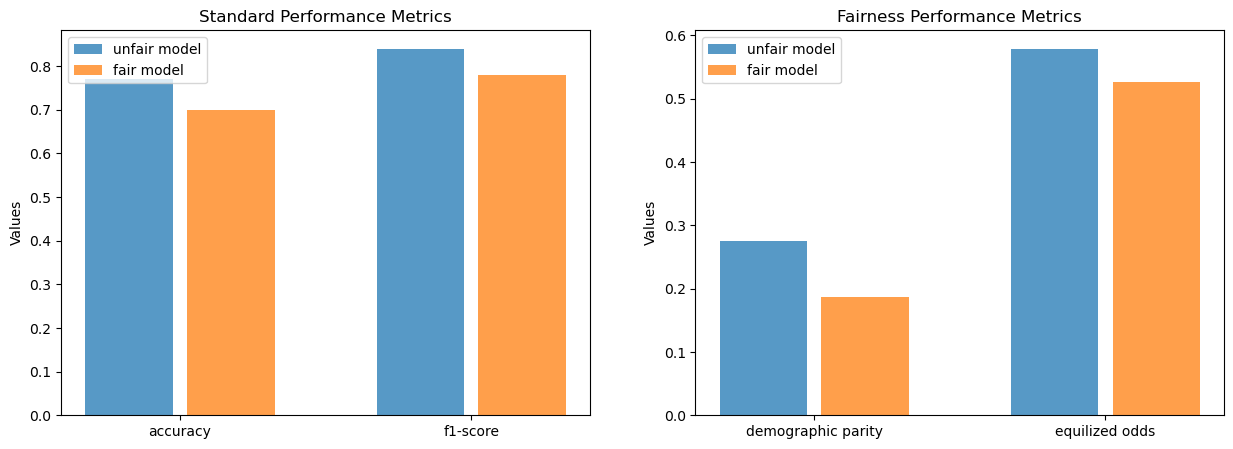

In [67]:
from sklearn.metrics import f1_score

y_pred_unfair_model = best_model.predict(X_test)
y_pred_fair_model = fairest_model.predict(X_test)   # X_test_wo_top_prot_attr) #, sensitive_features=X_test[top_protected_attr])

acc_unfair_model = accuracy_score(y_test, y_pred_unfair_model)
acc_fair_model = accuracy_score(y_test, y_pred_mitigated)

f1_unfair_model = f1_score(y_test, y_pred_unfair_model)
f1_fair_model = f1_score(y_test, y_pred_mitigated)

db_diff_fair = demographic_parity_difference(y_test, y_pred_fair_model, sensitive_features=X_test[top_protected_attr])
eo_fair = equalized_odds_difference(y_test, y_pred_fair_model, sensitive_features=X_test[top_protected_attr])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
width = 0.35

ax[0].bar(np.array([0, 1]) - width / 2, [acc_unfair_model, f1_unfair_model], width - 0.05, label = "unfair model", alpha=0.75)
ax[0].bar(np.array([0, 1]) + width / 2, [acc_fair_model, f1_fair_model], width - 0.05, label="fair model", alpha=0.75)

ax[1].bar(np.array([0, 1]) - width / 2, [dp_difference, eo_difference], width - 0.05, label = "unfair model", alpha=0.75)
ax[1].bar(np.array([0, 1]) + width / 2, [db_diff_fair, eo_fair], width - 0.05, label = "fair model", alpha=0.75)

ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["accuracy", "f1-score"])
ax[0].set_ylabel('Values')
ax[0].set_title('Standard Performance Metrics')
ax[0].legend()

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["demographic parity", "equilized odds"])
ax[1].set_ylabel('Values')
ax[1].set_title('Fairness Performance Metrics')
ax[1].legend()

# we selected the model enhanced with fairness which performs best in terms of fairness and accuracy

# Explain the ML Model Developed with Enhanced Fairness

In [68]:
fair_explainer = shap.Explainer(fairest_model) # mitigator.predictors_[0]
fair_shap_values = fair_explainer(X_test)

In [69]:
prot_att_idx = np.where(data.columns.isin(protected_attributes))[0]
prot_att_shap_vals = fair_shap_values[:, prot_att_idx]

C:\Users\William\AppData\Local\Temp\ipykernel_36024\3676252851.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(fair_shap_values, X_test, plot_size=(12, 8))


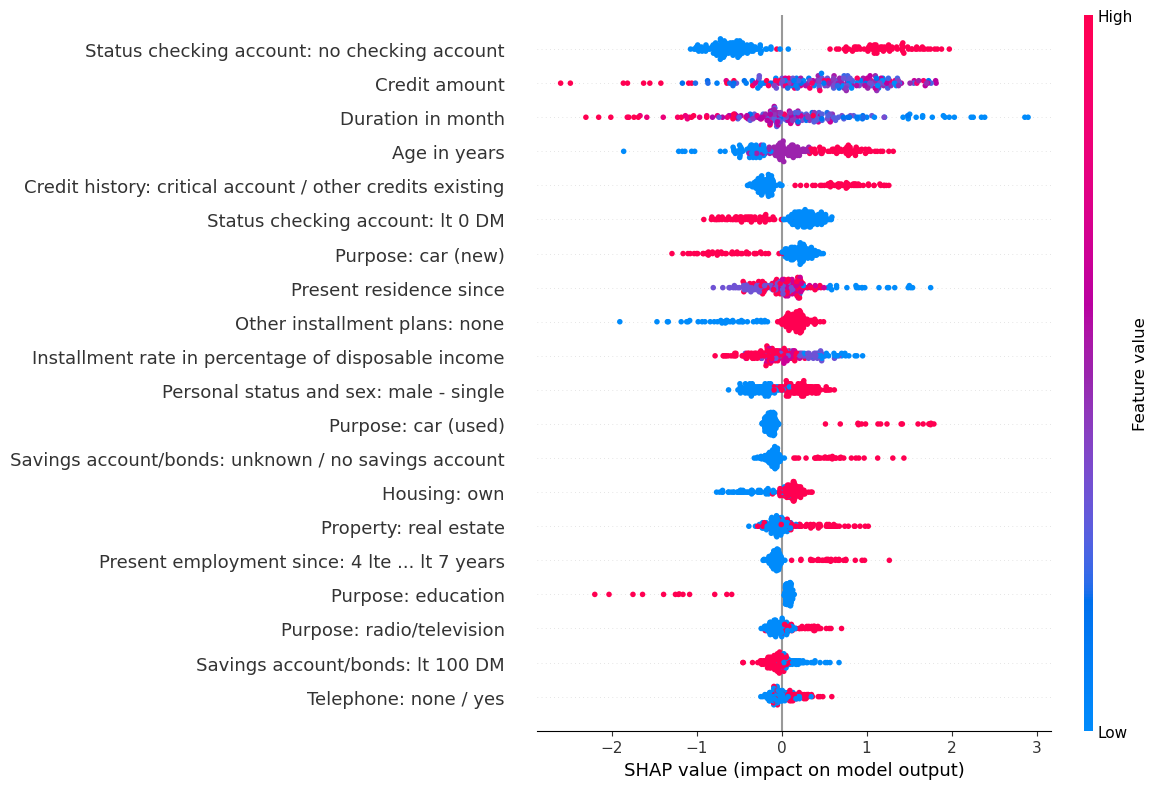

In [70]:
shap.summary_plot(fair_shap_values, X_test, plot_size=(12, 8))

C:\Users\William\AppData\Local\Temp\ipykernel_36024\4046879602.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(prot_att_shap_vals, X_test[protected_attributes], plot_size=(12, 8))


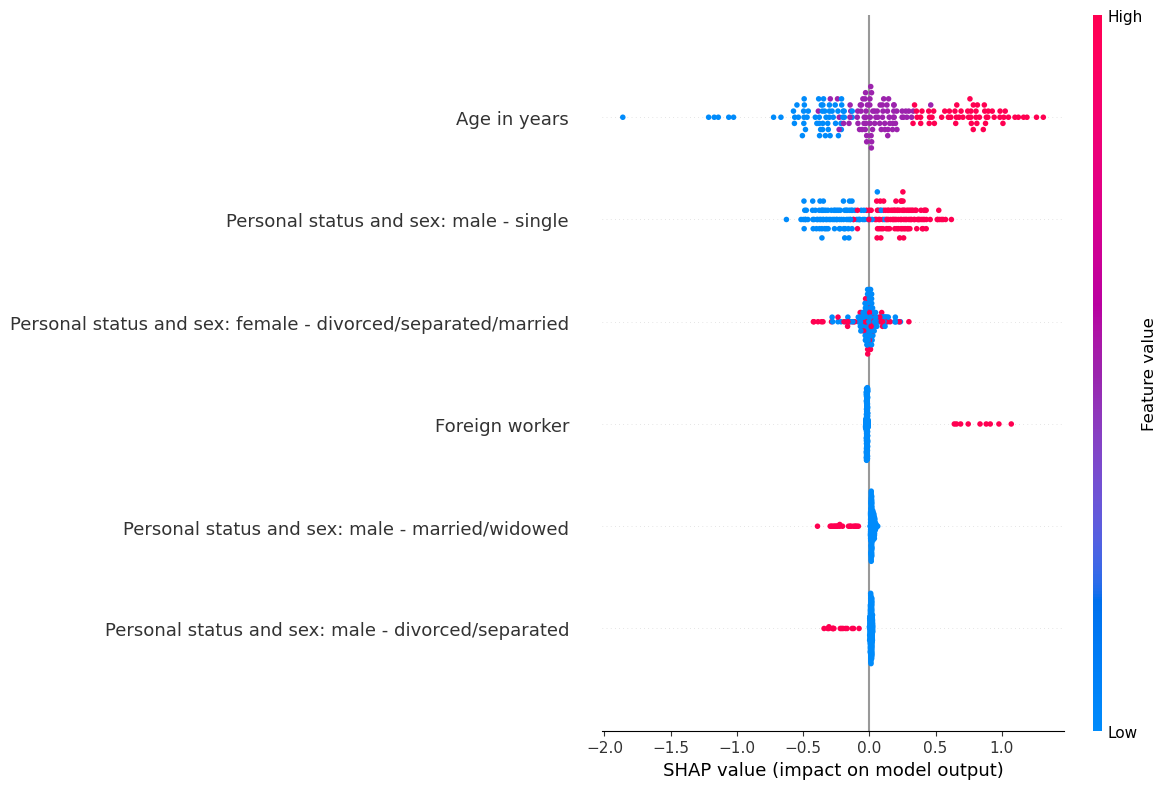

In [71]:
shap.summary_plot(prot_att_shap_vals, X_test[protected_attributes], plot_size=(12, 8))

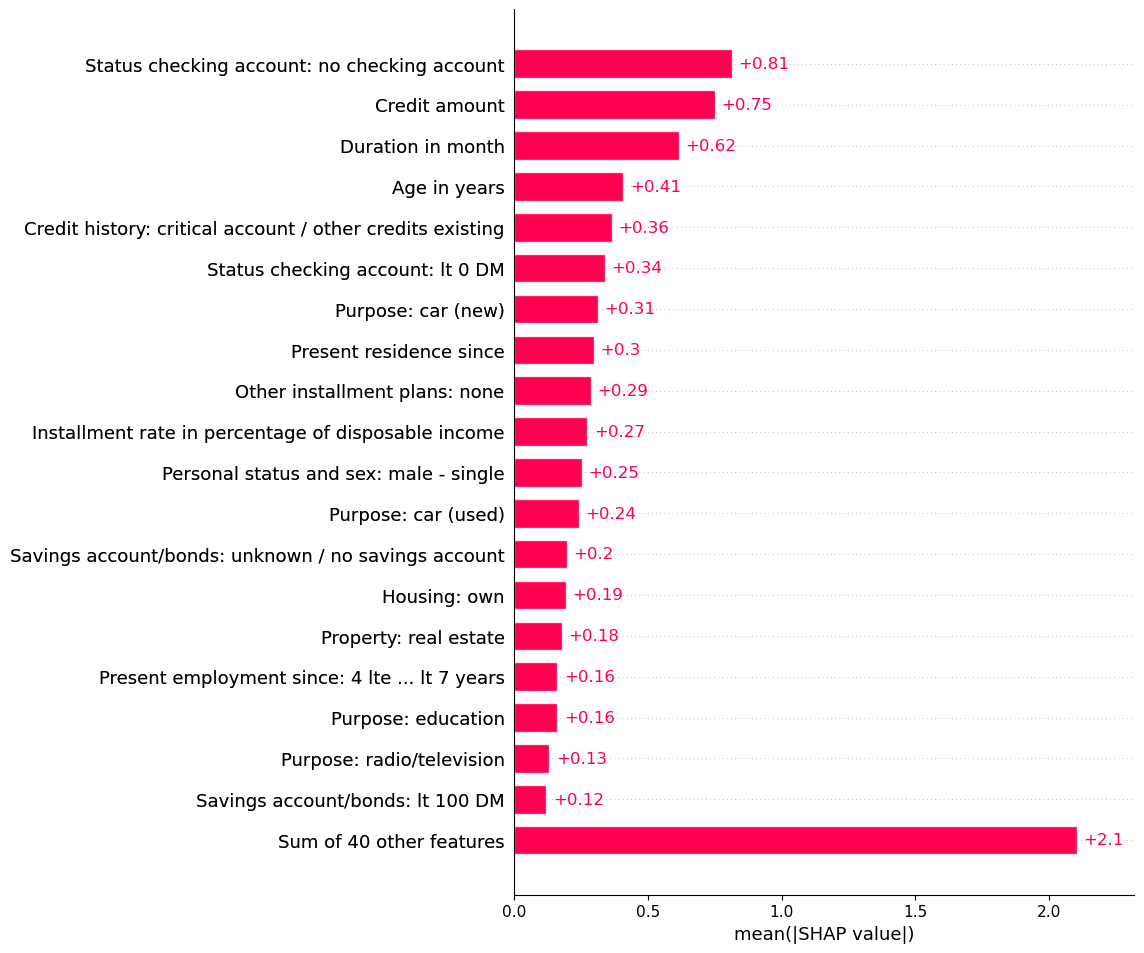

In [72]:
shap.plots.bar(fair_shap_values, max_display=20)

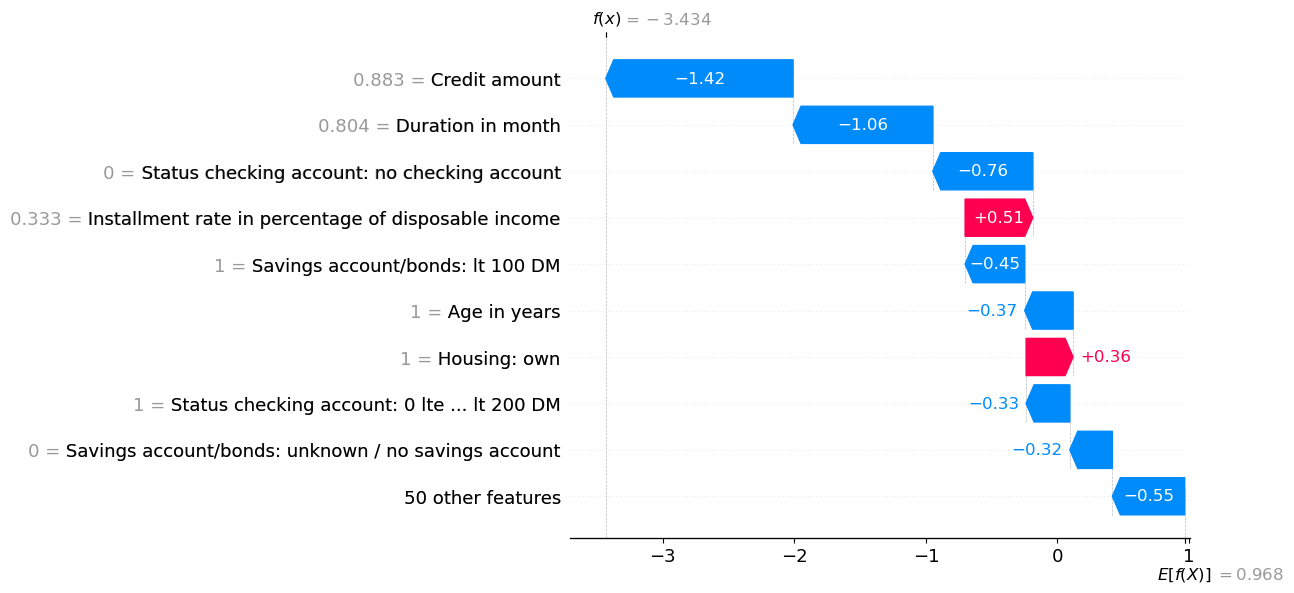

In [73]:
shap.plots.waterfall(fair_shap_values[rand_idx])

# compared to before age is not as important for a particular individual sample

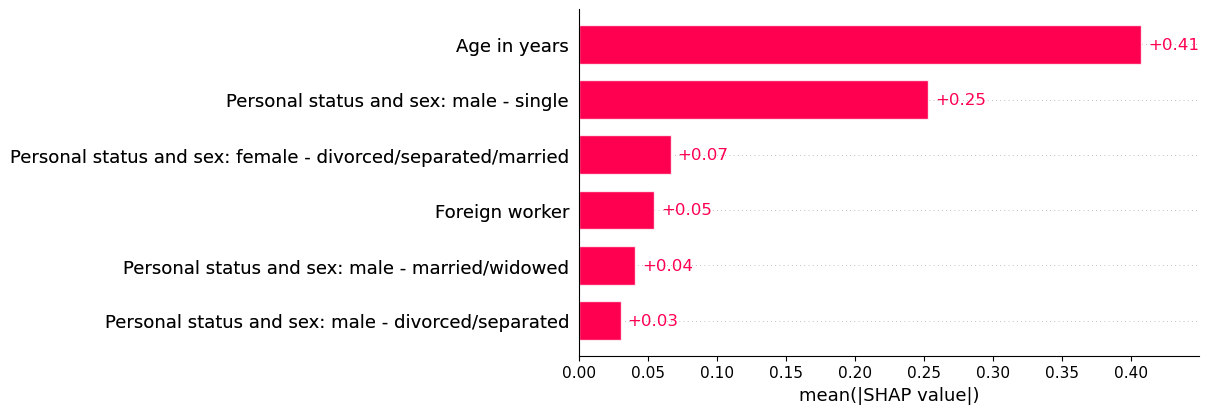

In [74]:
shap.plots.bar(prot_att_shap_vals)

# Quantify Change in Behavior Across Explanations

<Axes: >

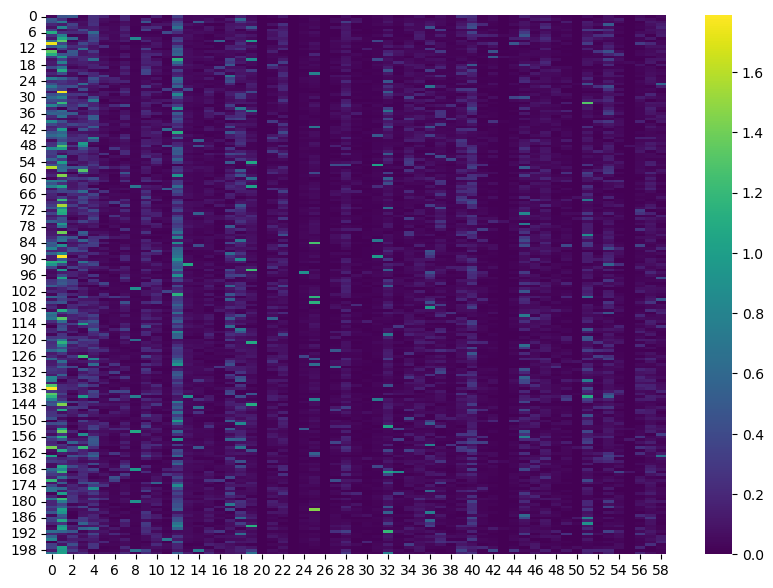

In [75]:
# compute distance between the two shap value matricies 

diff = abs(fair_shap_values.values - xgb_shap_values.values)

plt.figure(figsize=(10, 7))
sns.heatmap(diff, cmap="viridis")

# the lighter columns are features which changed the most (ex. col 0, 1, 12)

Age in years changed by: 0.0645
Foreign worker changed by: 0.0195
Personal status and sex: male - divorced/separated changed by: 0.0028
Personal status and sex: female - divorced/separated/married changed by: 0.0100
Personal status and sex: male - single changed by: 0.0085
Personal status and sex: male - married/widowed changed by: 0.0010


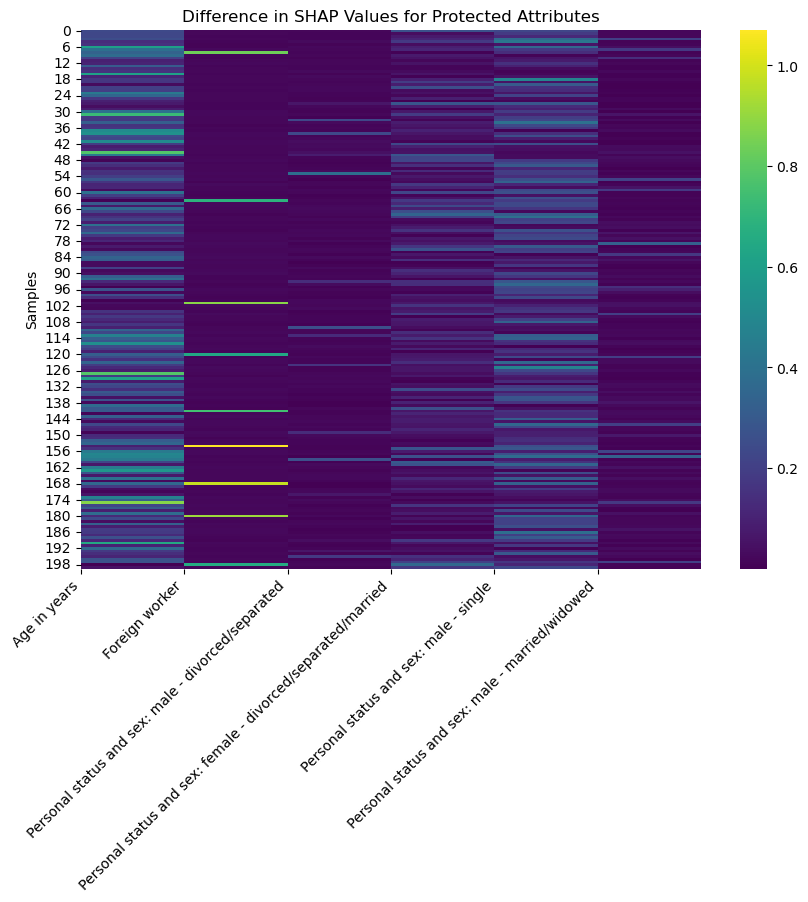

In [76]:
diff = abs(fair_shap_values.values[:, prot_att_idx] - xgb_shap_values.values[:, prot_att_idx])

plt.figure(figsize=(10, 7))

ax = sns.heatmap(diff, cmap="viridis")
ax.set_xticks(range(len(protected_attributes)))
ax.set_xticklabels(protected_attributes, rotation=45, ha='right')

plt.ylabel("Samples")
plt.title("Difference in SHAP Values for Protected Attributes")

for feature in protected_attributes:
    idx = np.where(np.array(protected_attributes) == feature)
    print(f"{feature} changed by: {abs(np.mean(fair_shap_values.values[:, prot_att_idx[idx]], axis=0) - np.mean(xgb_shap_values.values[:, prot_att_idx[idx]], axis=0))[0]:.4f}")

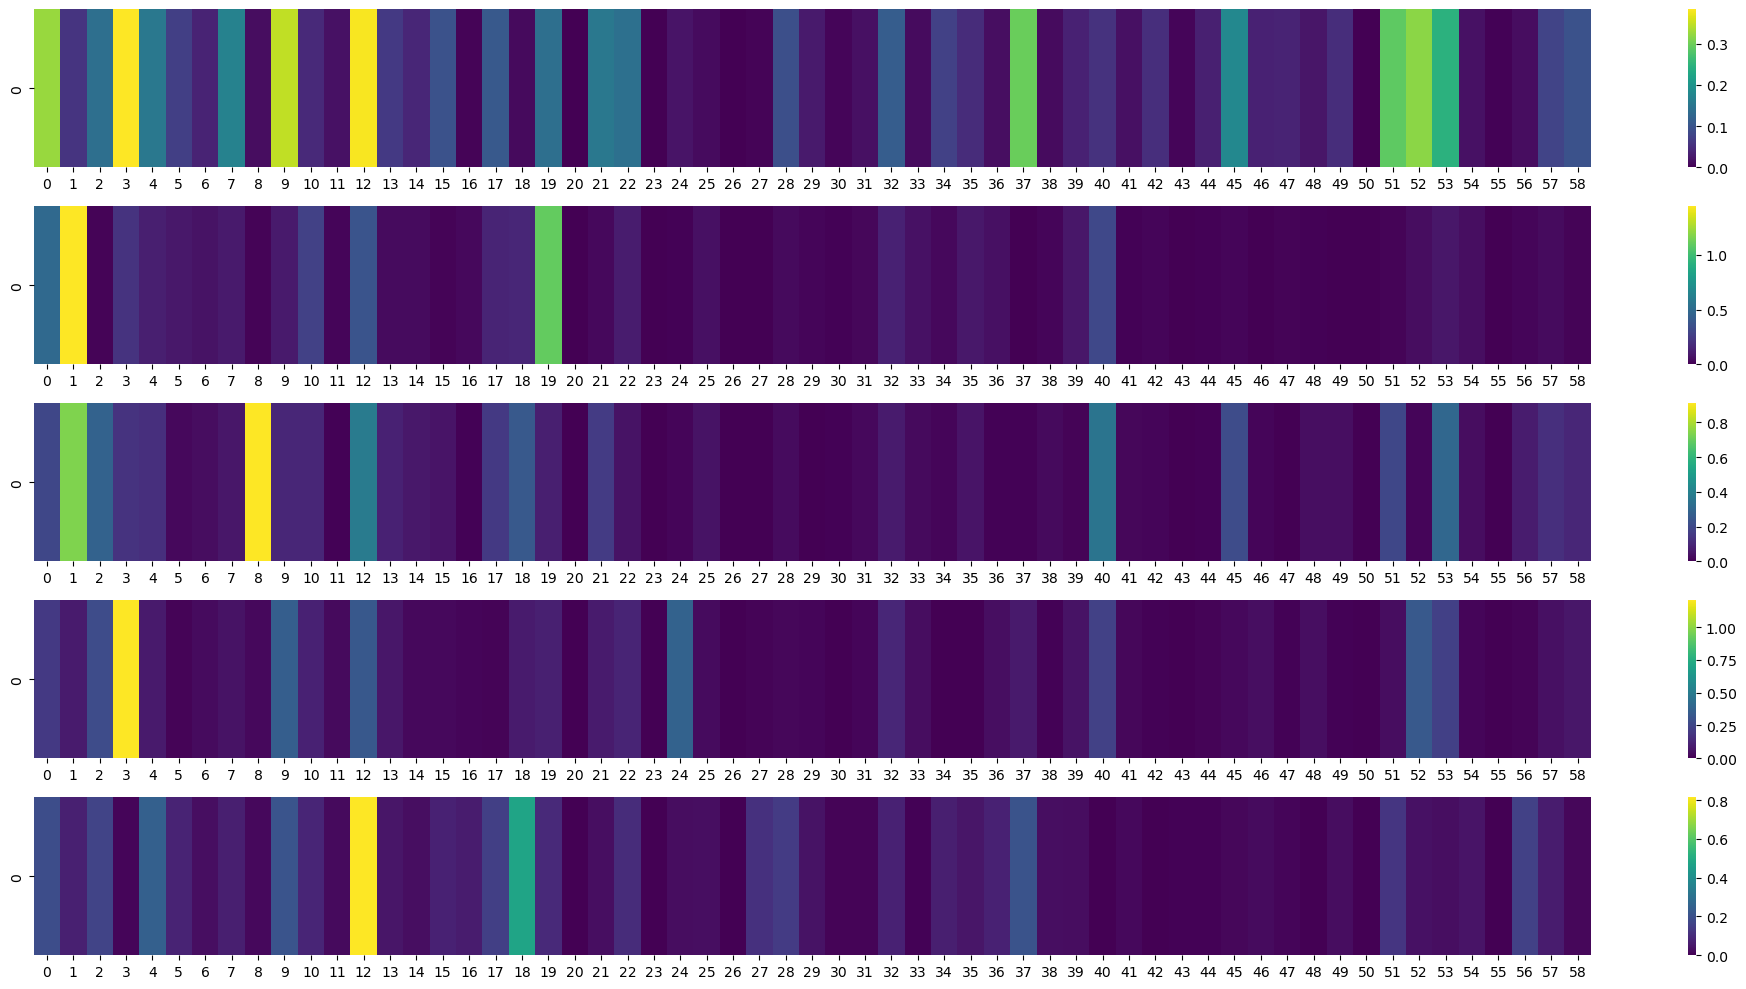

In [100]:
# add changes also for local smaples

diff = abs(fair_shap_values.values - xgb_shap_values.values)

fig, ax = plt.subplots(5, 1, figsize=(20, 10))

for i in range(5):
    sns.heatmap(diff[randint(0, len(fair_shap_values))].reshape(1, -1), cmap="viridis", ax=ax[i])
    
plt.tight_layout()